In [1]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('ticks')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  depr

In [2]:
df_train = pd.read_csv('dataset.csv', index_col=0)
df_test = pd.read_csv('validation_set.csv', index_col=0)

target = df_train['default payment next month']

In [3]:
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,200000,2,3,1,30,2,2,2,2,2,...,147273,149244,151973,6600,6000,5860,6000,5000,0,0
1,200000,2,4,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
2,20000,2,2,2,28,0,0,2,0,0,...,8168,6894,11424,3353,3,5101,6,6530,8103,1
3,50000,1,2,2,23,0,0,0,-1,0,...,48437,18712,19129,4175,41000,51705,700,718,700,0
4,20000,1,2,1,47,-1,-1,-1,-2,-2,...,0,0,0,780,0,0,0,0,0,0


In [4]:
df_train = df_train.astype(float)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 0 to 22499
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   22500 non-null  float64
 1   SEX                         22500 non-null  float64
 2   EDUCATION                   22500 non-null  float64
 3   MARRIAGE                    22500 non-null  float64
 4   AGE                         22500 non-null  float64
 5   PAY_0                       22500 non-null  float64
 6   PAY_2                       22500 non-null  float64
 7   PAY_3                       22500 non-null  float64
 8   PAY_4                       22500 non-null  float64
 9   PAY_5                       22500 non-null  float64
 10  PAY_6                       22500 non-null  float64
 11  BILL_AMT1                   22500 non-null  float64
 12  BILL_AMT2                   22500 non-null  float64
 13  BILL_AMT3                   225

In [6]:
df_train.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,...,22500.000000,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,167267.274667,1.602533,1.852356,1.549911,35.526000,-0.014978,-0.135200,-0.166800,-0.221333,-0.266533,...,43265.662667,40400.279733,38997.275778,5697.756489,5.944526e+03,5308.332489,4802.920444,4724.458178,5165.231067,0.221200
std,129383.700485,0.489385,0.787066,0.521673,9.231461,1.119429,1.189176,1.194886,1.166326,1.131526,...,64360.019334,60879.044012,59646.978910,17201.619690,2.214392e+04,18549.384158,15738.417203,14938.300190,17467.663795,0.415064
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-61372.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2280.000000,1760.000000,1243.750000,1000.000000,8.270000e+02,390.000000,300.000000,258.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19003.500000,18105.500000,17071.000000,2100.000000,2.006000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54562.500000,50343.750000,49355.500000,5009.000000,5.000000e+03,4510.500000,4001.500000,4000.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,527143.000000,1.000000


In [7]:
df_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
print(df_train.SEX.value_counts())
df_train.SEX = np.where(df_train.SEX == 2, 0, df_train.SEX)
print(df_train.SEX.value_counts())

2.0    13557
1.0     8943
Name: SEX, dtype: int64
0.0    13557
1.0     8943
Name: SEX, dtype: int64


In [9]:
conditions = [df_train.MARRIAGE == 3, df_train.MARRIAGE == 2]
choices = [0, 0]

print(df_train.MARRIAGE.value_counts())
df_train.MARRIAGE = np.select(conditions, choices, df_train.MARRIAGE)
print(df_train.MARRIAGE.value_counts())

2.0    11942
1.0    10281
3.0      236
0.0       41
Name: MARRIAGE, dtype: int64
0.0    12219
1.0    10281
Name: MARRIAGE, dtype: int64


In [10]:
conditions = [df_train.EDUCATION == 5, df_train.EDUCATION == 6, df_train.EDUCATION == 0]
choices = [4, 4, 4]

print(df_train.EDUCATION.value_counts())
df_train.EDUCATION = np.select(conditions, choices, df_train.EDUCATION)
print(df_train.EDUCATION.value_counts())

2.0    10546
1.0     7921
3.0     3690
5.0      205
4.0       90
6.0       35
0.0       13
Name: EDUCATION, dtype: int64
2.0    10546
1.0     7921
3.0     3690
4.0      343
Name: EDUCATION, dtype: int64


In [11]:
df_train.rename(columns={'default payment next month': 'default', 'PAY_0': 'PAY_1'}, inplace=True)

In [12]:
col_dict = {col: col.lower() for col in df_train.columns}
df_train.rename(columns=col_dict, inplace = True)
df_train.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [13]:
df_initial = df_train.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11df6dda0>]],
      dtype=object)

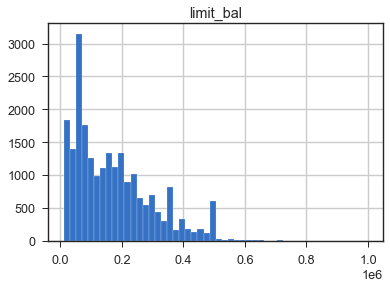

In [14]:
df_train.hist('limit_bal', bins=50)

In [15]:
df_train['sum_paycodes'] = df_train['pay_1'] + df_train['pay_2'] + df_train['pay_3'] + df_train['pay_4'] + df_train['pay_5'] + df_train['pay_6']
df_train['limit_paycodes'] = df_train['limit_bal'] * df_train['sum_paycodes'].apply(lambda x: x-.01)

In [16]:
df_train['limit_paycodes'].describe()

count    2.250000e+04
mean    -4.241969e+05
std      1.210267e+06
min     -9.367800e+06
25%     -7.218000e+05
50%     -2.400000e+03
75%     -2.000000e+02
max      1.682490e+07
Name: limit_paycodes, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13a9775c0>]],
      dtype=object)

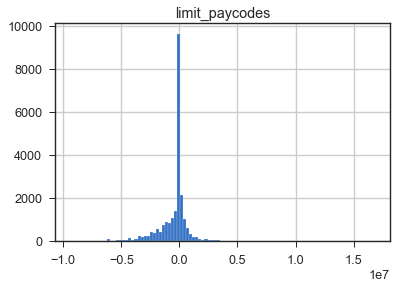

In [17]:
df_train.hist('limit_paycodes', bins=100)

In [18]:
df_train['default'].corr(df_train['limit_paycodes'])

0.16890519416207475

In [19]:
to_bin = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

for col in to_bin:
    conditions = [df_train[col] <= 0, df_train[col] > 0]
    choices = [0, 1]
    df_train[col + '_bin'] = np.select(conditions, choices, df_train[col])

In [20]:
bin_cols = ['pay_1_bin', 'pay_2_bin', 'pay_3_bin', 'pay_4_bin', 'pay_5_bin', 'pay_6_bin']

for col in bin_cols:
    print('-------------------------------')
    print(df_train.groupby('default')[col].value_counts(normalize=True))
    print('-------------------------------')

-------------------------------
default  pay_1_bin
0.0      0.0          0.853564
         1.0          0.146436
1.0      1.0          0.511151
         0.0          0.488849
Name: pay_1_bin, dtype: float64
-------------------------------
-------------------------------
default  pay_2_bin
0.0      0.0          0.915311
         1.0          0.084689
1.0      0.0          0.632309
         1.0          0.367691
Name: pay_2_bin, dtype: float64
-------------------------------
-------------------------------
default  pay_3_bin
0.0      0.0          0.914056
         1.0          0.085944
1.0      0.0          0.671087
         1.0          0.328913
Name: pay_3_bin, dtype: float64
-------------------------------
-------------------------------
default  pay_4_bin
0.0      0.0          0.930777
         1.0          0.069223
1.0      0.0          0.718907
         1.0          0.281093
Name: pay_4_bin, dtype: float64
-------------------------------
-------------------------------
default  pay

In [21]:
df_train['avg_bill'] = (df_train['bill_amt1'] + df_train['bill_amt2'] + df_train['bill_amt3'] + df_train['bill_amt4'] + df_train['bill_amt5'] + df_train['bill_amt6']).apply(lambda x: x/6)
df_train['avg_pay'] = (df_train['pay_amt1'] + df_train['pay_amt2'] + df_train['pay_amt3'] + df_train['pay_amt4'] + df_train['pay_amt5'] + df_train['pay_amt6']).apply(lambda x: x/6)


In [22]:
df_train['avg_bill'].describe()

count     22500.000000
mean      44944.329207
std       63117.927375
min      -20913.333333
25%        4726.000000
50%       21102.416667
75%       57202.125000
max      877313.833333
Name: avg_bill, dtype: float64

In [23]:
df_train['avg_pay'].describe()

count     22500.000000
mean       5273.870800
std       10244.258824
min           0.000000
25%        1104.125000
50%        2385.166667
75%        5542.208333
max      627344.333333
Name: avg_pay, dtype: float64

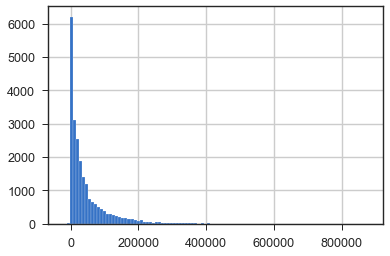

In [24]:
df_train['avg_bill'].hist(bins=100)

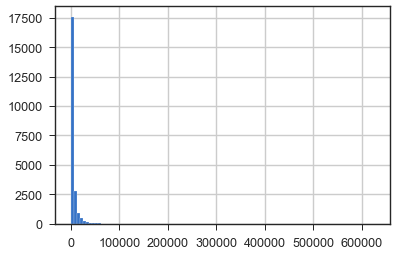

In [25]:
df_train['avg_pay'].hist(bins=100)

In [26]:
df_train['avg_diff'] = df_train['avg_bill'] - df_train['avg_pay']
df_train['avg_diff'].describe()

count     22500.000000
mean      39670.458407
std       60364.162403
min     -445252.333333
25%         743.041667
50%       17081.750000
75%       51067.958333
max      686013.333333
Name: avg_diff, dtype: float64

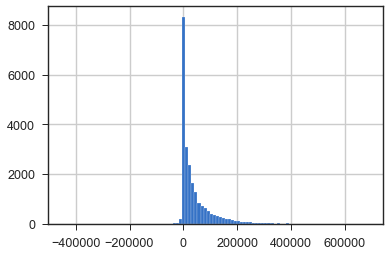

In [27]:
df_train['avg_diff'].hist(bins=100)

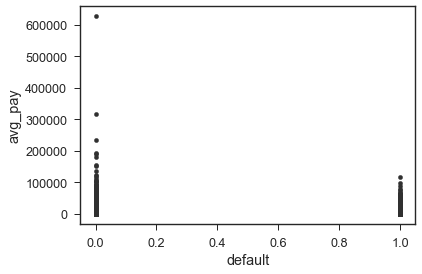

In [28]:
df_train.plot.scatter('default', 'avg_pay')

Paycode 1 Summary


default      0.0   1.0
pay_1_bin             
0.0        14957  2433
1.0         2566  2544


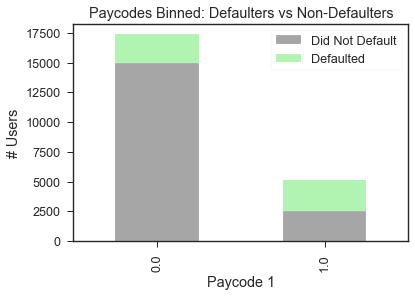

In [29]:
print('Paycode 1 Summary')

print('\n')
print(df_train.groupby(['pay_1_bin','default']).pay_1_bin.count().unstack())

# Passenger class visualization
pay1_bin = df_train.groupby(['pay_1_bin','default']).pay_1_bin.count().unstack()
p1 = pay1_bin.plot(kind = 'bar', stacked = True, 
                   title = 'Paycodes Binned: Defaulters vs Non-Defaulters', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Paycode 1')
p1.set_ylabel('# Users')
p1.legend(['Did Not Default','Defaulted'])
plt.show()

Paycode 2 Summary


default      0.0   1.0
pay_2_bin             
0.0        16039  3147
1.0         1484  1830


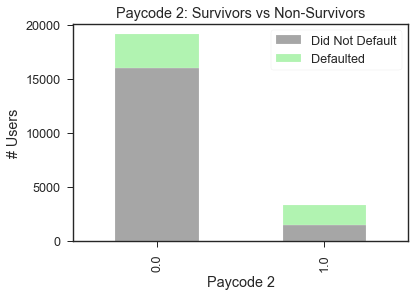

In [30]:
print('Paycode 2 Summary')

print('\n')
print(df_train.groupby(['pay_2_bin','default'])['pay_2_bin'].count().unstack())

pay2 = df_train.groupby(['pay_2_bin','default'])['pay_2_bin'].count().unstack()
p2 = pay2.plot(kind = 'bar', stacked = True, 
                   title = 'Paycode 2: Survivors vs Non-Survivors', 
                   color = ['grey','lightgreen'], alpha = .70)
p2.set_xlabel('Paycode 2')
p2.set_ylabel('# Users')
p2.legend(['Did Not Default','Defaulted'])
plt.show()

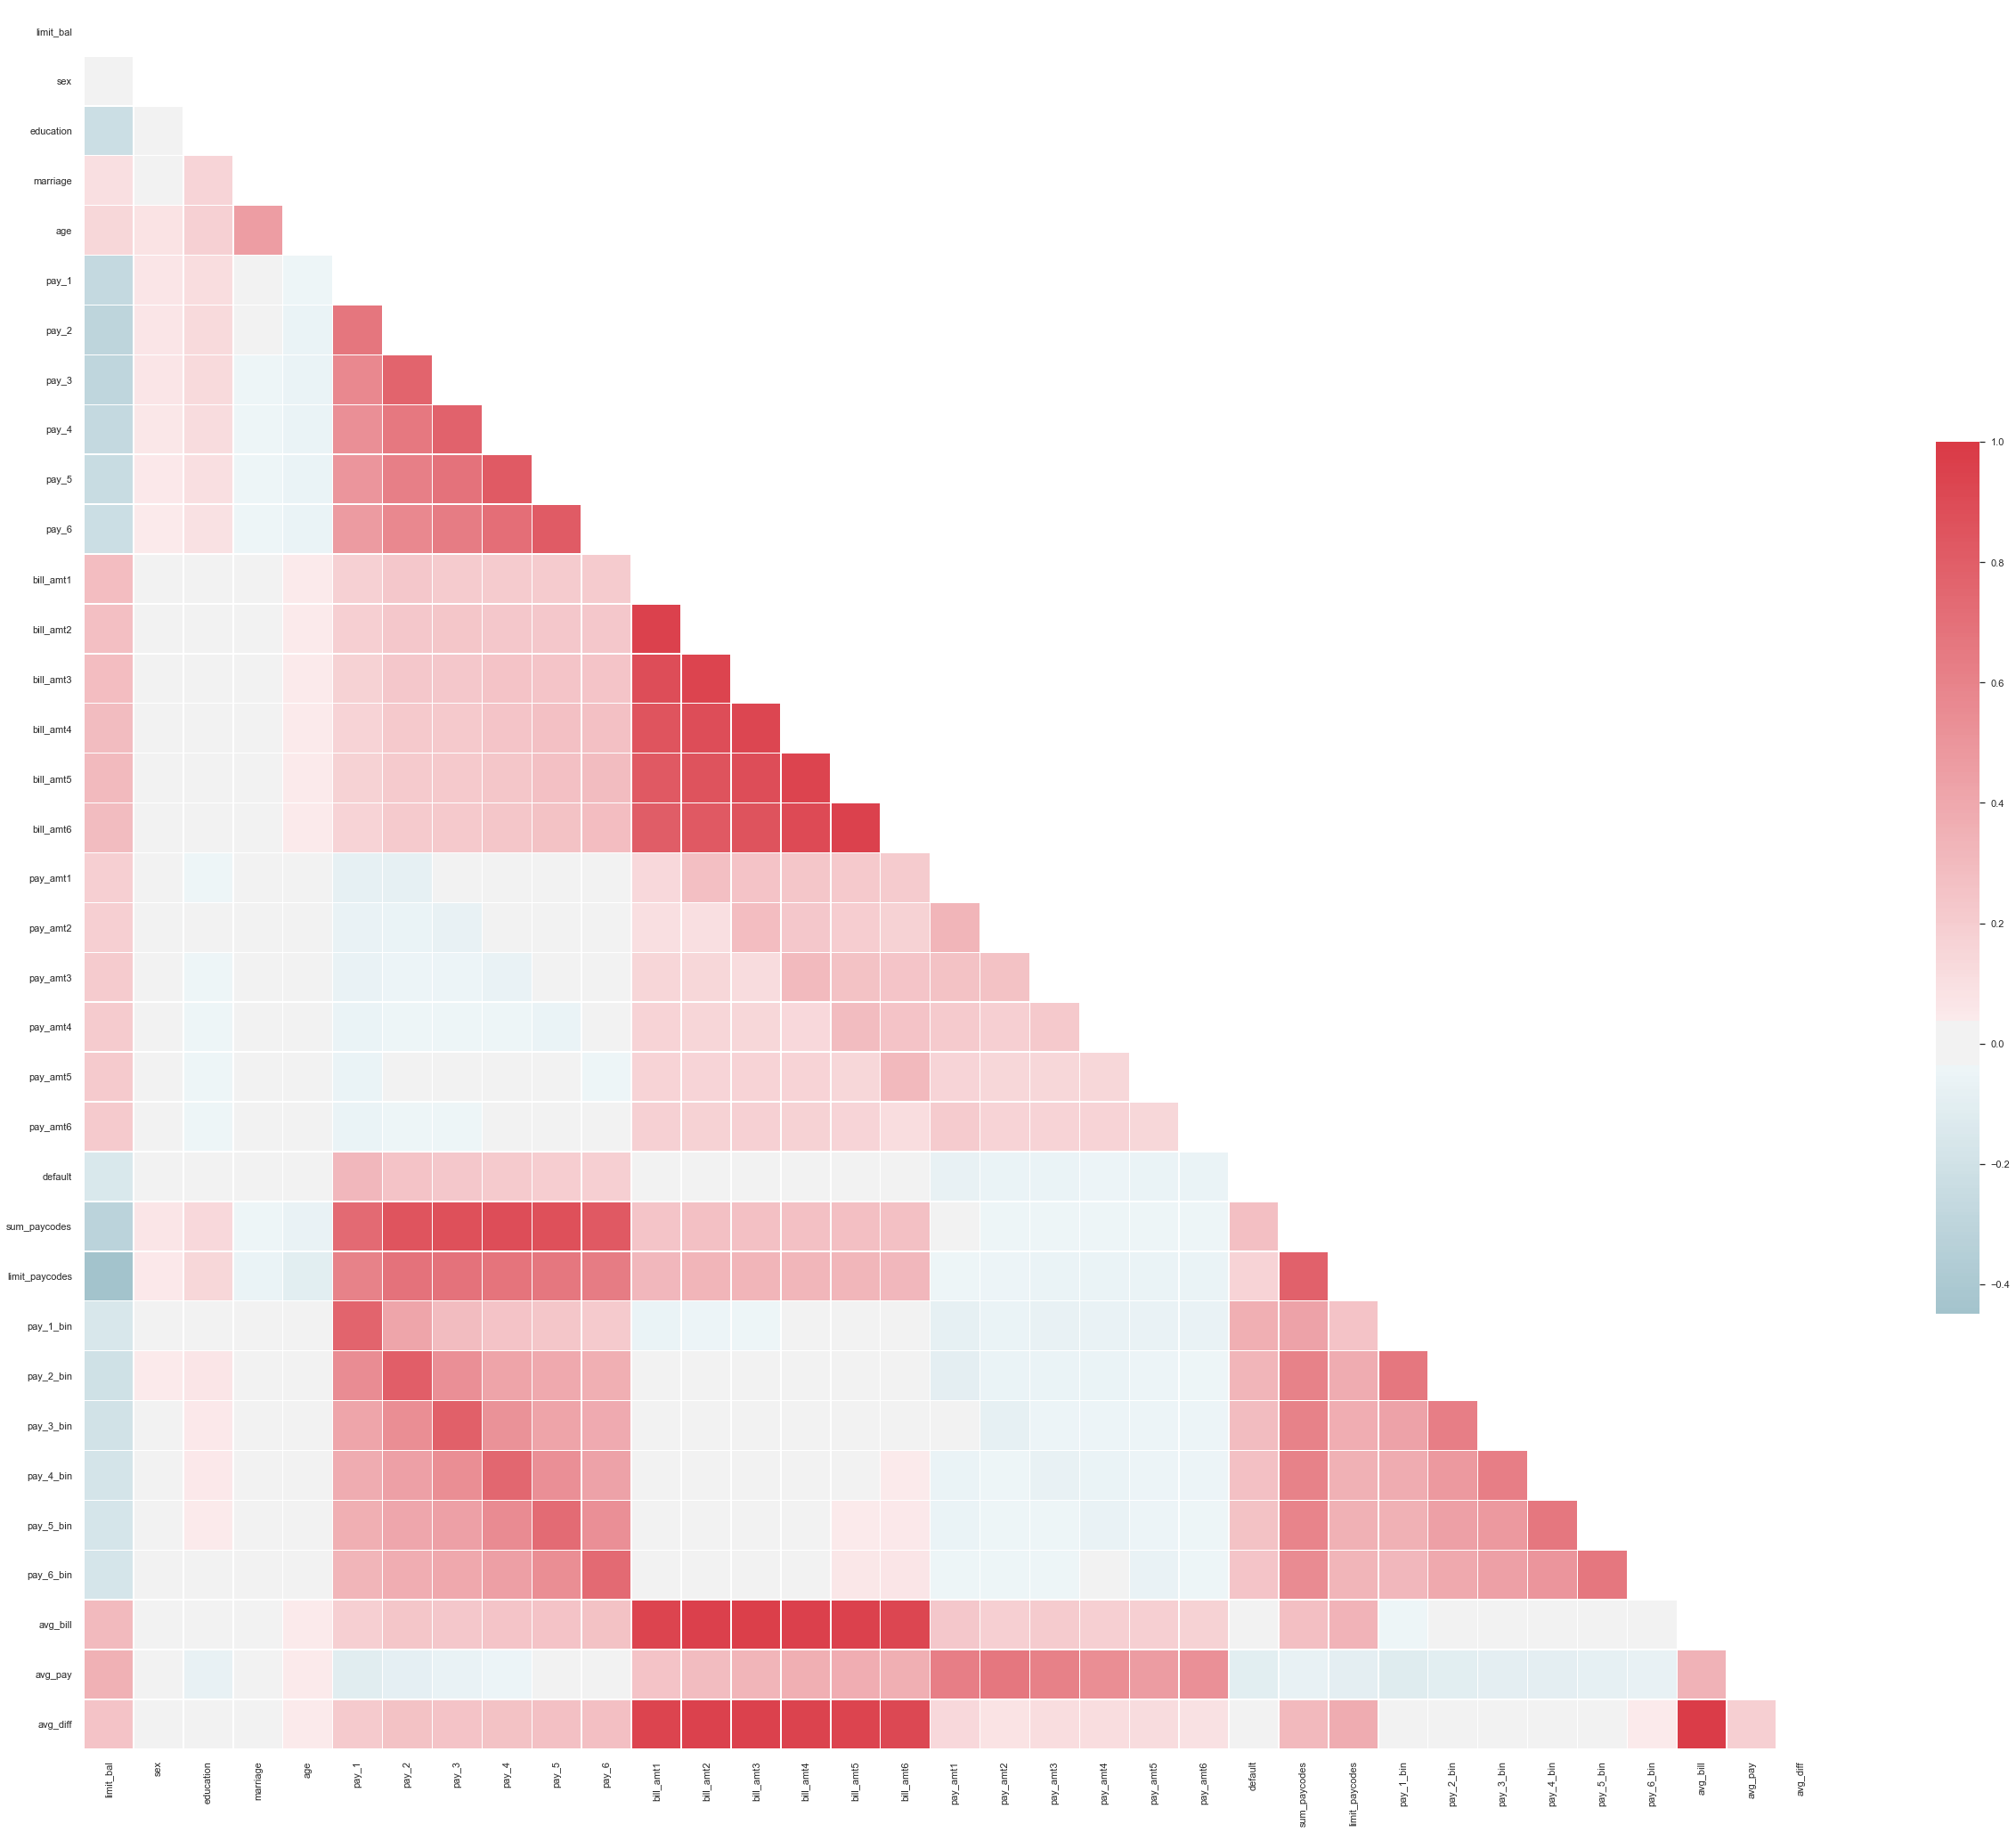

In [31]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(44, 36))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
to_drop = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
           'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']

df_train.drop(columns=to_drop, inplace=True)

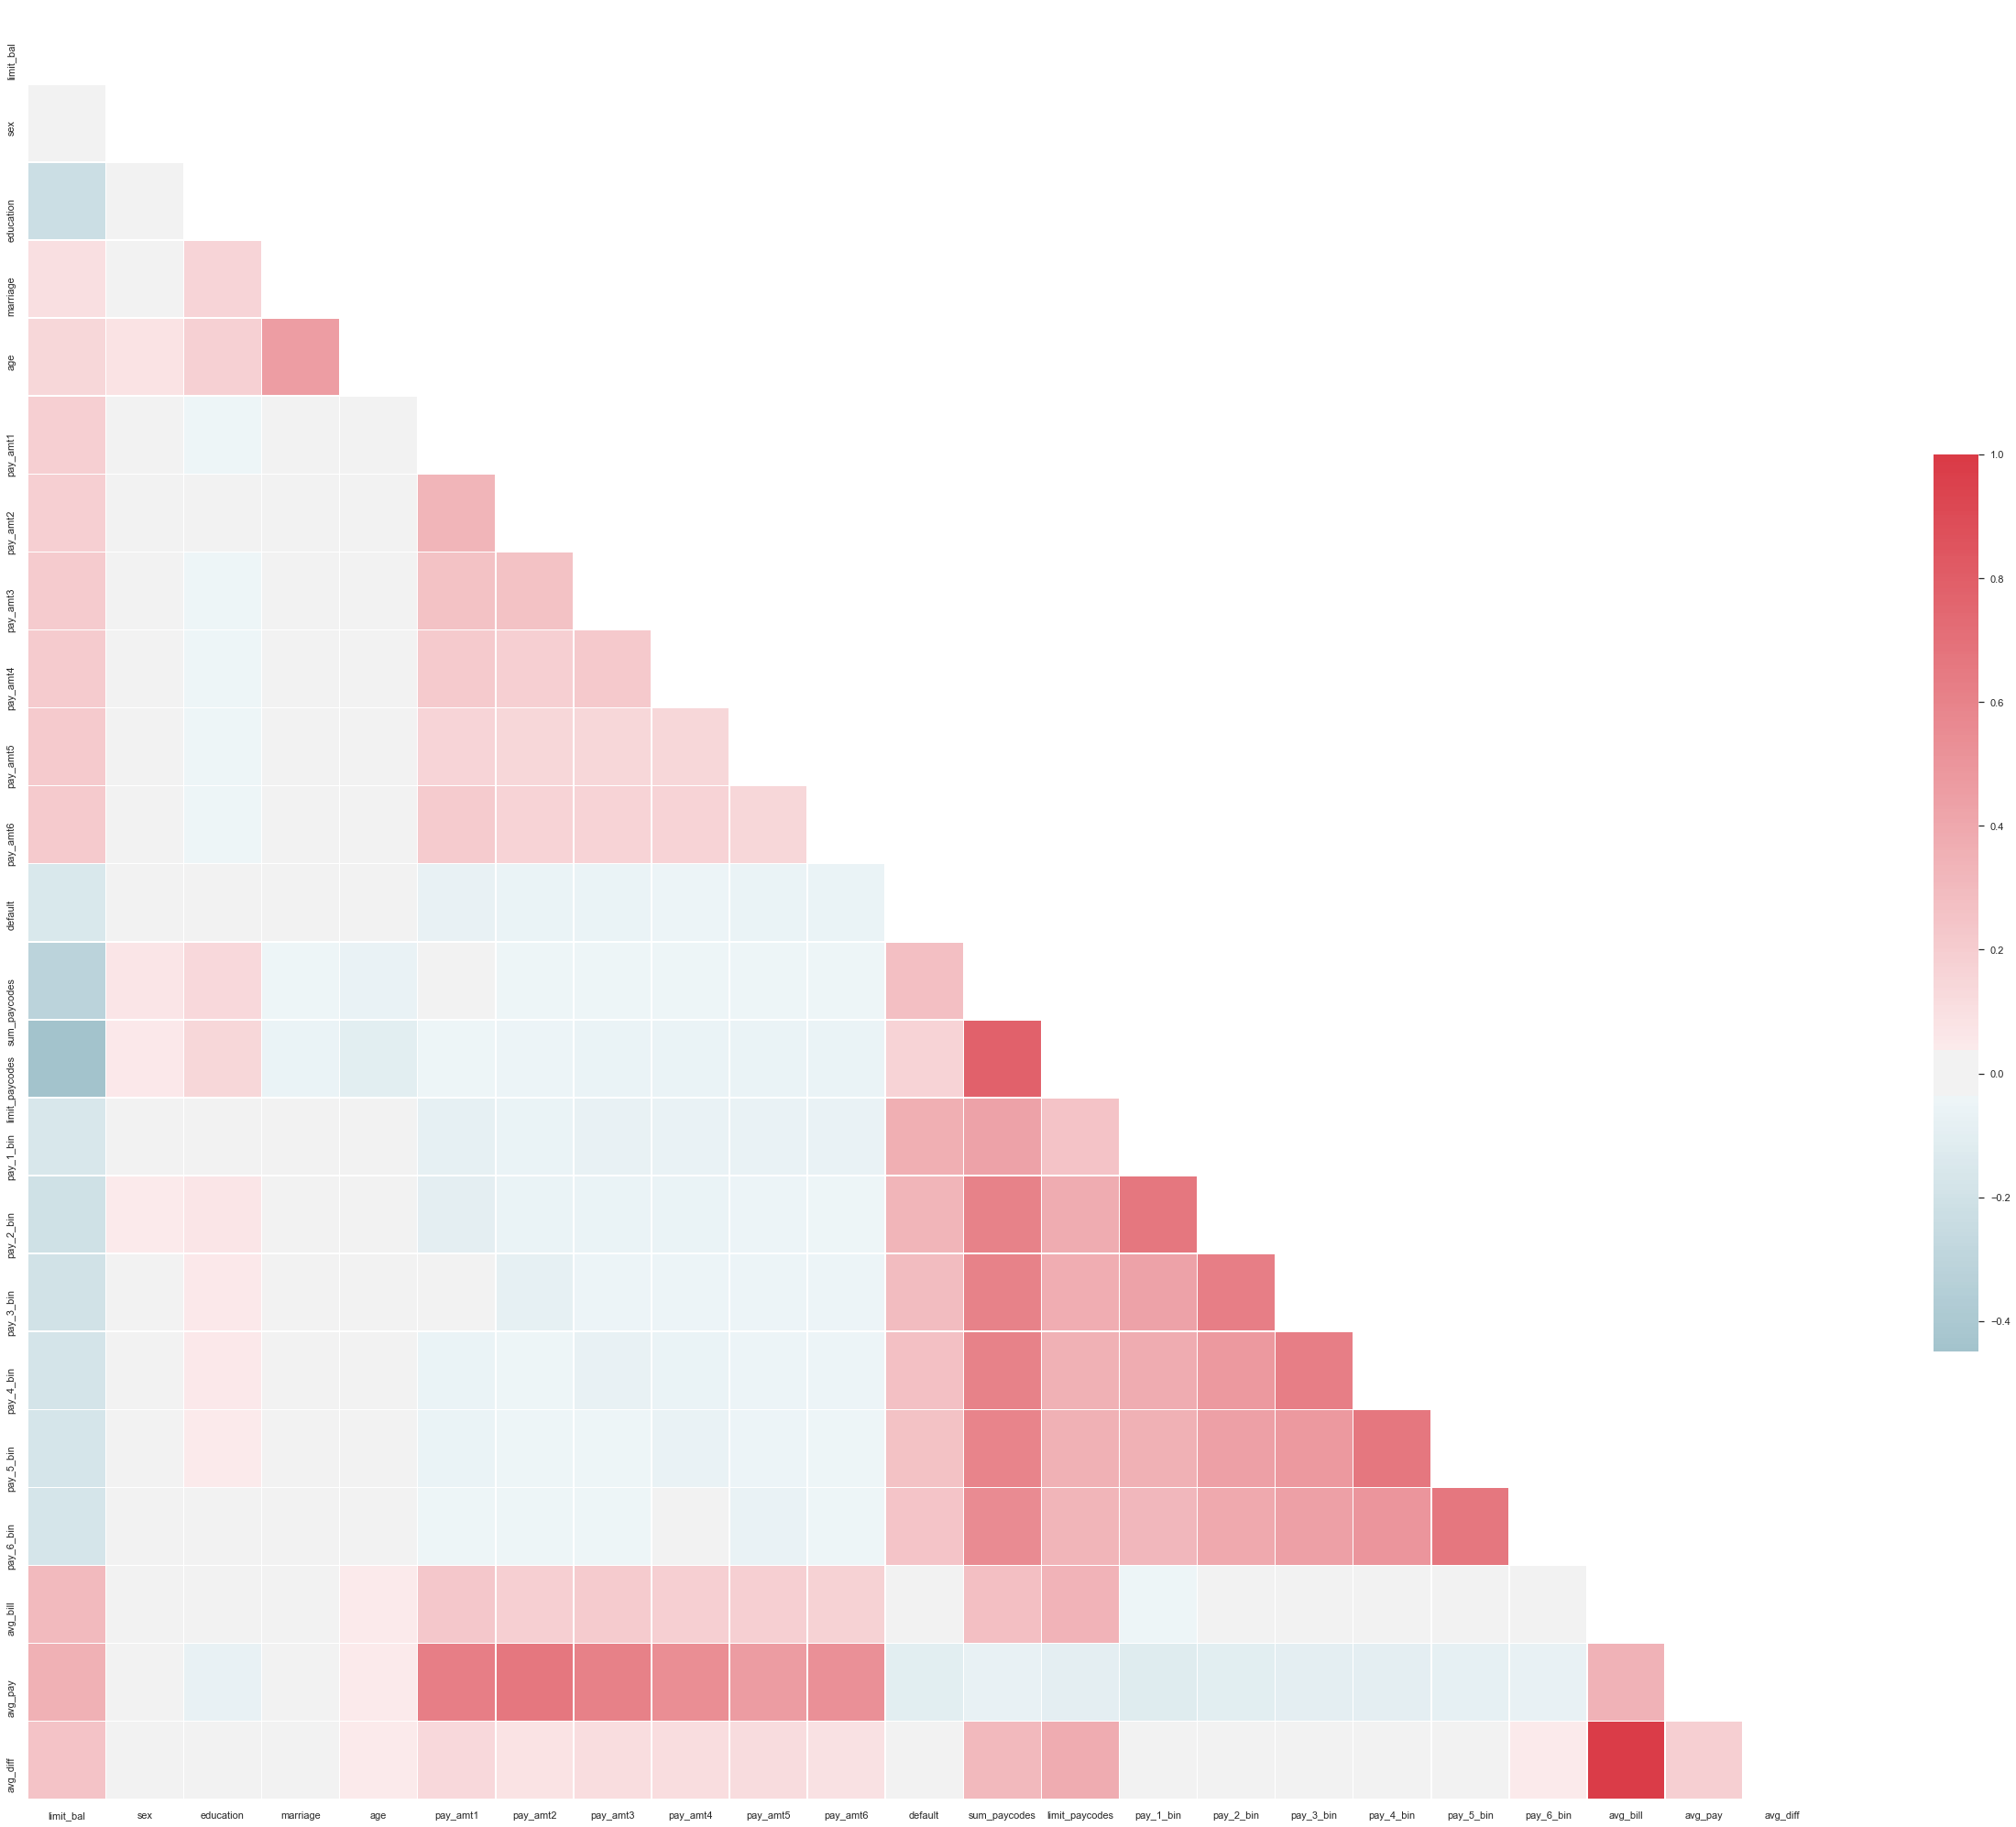

In [33]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(44, 36))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
df_train.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default',
       'sum_paycodes', 'limit_paycodes', 'pay_1_bin', 'pay_2_bin', 'pay_3_bin',
       'pay_4_bin', 'pay_5_bin', 'pay_6_bin', 'avg_bill', 'avg_pay',
       'avg_diff'],
      dtype='object')

In [35]:
dummy_dataframe = pd.get_dummies(df_train['education'], prefix='education', drop_first=True, dtype=float)
dummy_dataframe.columns = [col.replace('.0', '') for col in dummy_dataframe.columns]
dummy_dataframe.columns

Index(['education_2', 'education_3', 'education_4'], dtype='object')

In [36]:
y = df_train['default']
X = pd.concat([df_train.drop(columns=['default', 'education'], axis=1), dummy_dataframe], axis=1)
X.head()

,limit_bal,sex,marriage,age,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,...,pay_3_bin,pay_4_bin,pay_5_bin,pay_6_bin,avg_bill,avg_pay,avg_diff,education_2,education_3,education_4
0,200000.0,0.0,1.0,30.0,6600.0,6000.0,5860.0,6000.0,5000.0,0.0,...,1.0,1.0,1.0,1.0,146221.333333,4910.000000,141311.333333,0.0,1.0,0.0
1,200000.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0
2,20000.0,0.0,0.0,28.0,3353.0,3.0,5101.0,6.0,6530.0,8103.0,...,1.0,0.0,0.0,0.0,6543.833333,3849.333333,2694.500000,1.0,0.0,0.0
3,50000.0,1.0,0.0,23.0,4175.0,41000.0,51705.0,700.0,718.0,700.0,...,0.0,0.0,0.0,0.0,39625.000000,16499.666667,23125.333333,1.0,0.0,0.0
4,20000.0,1.0,1.0,47.0,780.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,195.000000,130.000000,65.000000,1.0,0.0,0.0


In [37]:
def find_extremes(df):
    '''Takes in a dataframe and returns a list of columns with values farther than 4 standard deviations from the mean.'''
    extreme_list = []
    for column in list(df.columns):
        if (df[column].max() > (df[column].mean() + 4*df[column].std())) or (df[column].min() < (df[column].mean() - 4*df[column].std())):
            extreme_list.append(column)
    return extreme_list

def rein_extremes(df, columns):
    '''Takes in a dataframe and a list of columns and changes any values farther than 4 standard deviations from the mean
    to 4 standard deviations from the mean.
    Overwrites the input column!'''
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        conditions = [df[column] > mean + 4*std,
                      df[column] < mean - 4*std]
        choices = [mean + 4*std,
                   mean - 4*std]
        df[column] = np.select(conditions, choices, df[column])

In [38]:
extreme_cols = find_extremes(X)
extreme_cols

['limit_bal',
 'age',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'sum_paycodes',
 'limit_paycodes',
 'avg_bill',
 'avg_pay',
 'avg_diff',
 'education_4']

In [39]:
# Remove target variable, so we don't replace any values.
extreme_cols.remove('education_4')
extreme_cols.remove('age')
X[extreme_cols].describe()

,limit_bal,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,sum_paycodes,limit_paycodes,avg_bill,avg_pay,avg_diff
count,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000
mean,167267.274667,5697.756489,5.944526e+03,5308.332489,4802.920444,4724.458178,5165.231067,-1.094133,-4.241969e+05,44944.329207,5273.870800,39670.458407
std,129383.700485,17201.619690,2.214392e+04,18549.384158,15738.417203,14938.300190,17467.663795,5.871684,1.210267e+06,63117.927375,10244.258824,60364.162403
min,10000.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-12.000000,-9.367800e+06,-20913.333333,0.000000,-445252.333333
25%,50000.000000,1000.000000,8.270000e+02,390.000000,300.000000,258.000000,118.000000,-5.000000,-7.218000e+05,4726.000000,1104.125000,743.041667
50%,140000.000000,2100.000000,2.006000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000,-2.400000e+03,21102.416667,2385.166667,17081.750000
75%,240000.000000,5009.000000,5.000000e+03,4510.500000,4001.500000,4000.000000,4000.000000,0.000000,-2.000000e+02,57202.125000,5542.208333,51067.958333
max,1000000.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,527143.000000,36.000000,1.682490e+07,877313.833333,627344.333333,686013.333333


In [40]:

rein_extremes(X, extreme_cols)
X[extreme_cols].describe()

,limit_bal,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,sum_paycodes,limit_paycodes,avg_bill,avg_pay,avg_diff
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000
mean,167219.347347,5091.971806,5261.128031,4653.850035,4225.705861,4143.559305,4431.180831,-1.117694,-4.224320e+05,44141.196472,5040.408665,38917.448763
std,129165.157323,9912.110569,11516.629068,10262.975499,9247.161895,8835.252275,10384.344098,5.759077,1.168069e+06,58864.410765,7536.284042,56291.638835
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,-5.265267e+06,-20913.333333,0.000000,-201786.191204
25%,50000.000000,1000.000000,827.000000,390.000000,300.000000,258.000000,118.000000,-5.000000,-7.218000e+05,4726.000000,1104.125000,743.041667
50%,140000.000000,2100.000000,2006.000000,1800.000000,1500.000000,1500.000000,1500.000000,0.000000,-2.400000e+03,21102.416667,2385.166667,17081.750000
75%,240000.000000,5009.000000,5000.000000,4510.500000,4001.500000,4000.000000,4000.000000,0.000000,-2.000000e+02,57202.125000,5542.208333,51067.958333
max,684802.076605,74504.235248,94520.207550,79505.869122,67756.589258,64477.658936,75035.886248,22.392602,4.416873e+06,297416.038707,46250.906095,281127.108018


## INTERACTIONS

In [41]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly = polynomial_features_2.fit_transform(X)
poly_columns = polynomial_features_2.get_feature_names(X.columns)

X_poly = pd.DataFrame(X_poly, columns=poly_columns)
X_poly.head()

,limit_bal,sex,marriage,age,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,...,avg_diff^2,avg_diff education_2,avg_diff education_3,avg_diff education_4,education_2^2,education_2 education_3,education_2 education_4,education_3^2,education_3 education_4,education_4^2
0,200000.0,0.0,1.0,30.0,6600.0,6000.0,5860.0,6000.0,5000.0,0.0,...,1.996889e+10,0.000000,141311.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,200000.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,20000.0,0.0,0.0,28.0,3353.0,3.0,5101.0,6.0,6530.0,8103.0,...,7.260330e+06,2694.500000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,50000.0,1.0,0.0,23.0,4175.0,41000.0,51705.0,700.0,718.0,700.0,...,5.347810e+08,23125.333333,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,20000.0,1.0,1.0,47.0,780.0,0.0,0.0,0.0,0.0,0.0,...,4.225000e+03,65.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [42]:
X_poly_cols = [col.replace(' ', '_') for col in X_poly.columns]
X_poly.columns = X_poly_cols

In [43]:
# Create correlation matrix
corr_matrix = X_poly.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,limit_bal,sex,marriage,age,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,...,avg_diff^2,avg_diff_education_2,avg_diff_education_3,avg_diff_education_4,education_2^2,education_2_education_3,education_2_education_4,education_3^2,education_3_education_4,education_4^2
limit_bal,NaN,0.027831,0.102963,0.144220,0.261853,0.262966,0.264123,0.267742,0.265959,0.272241,...,0.321247,0.111769,0.009954,0.029345,0.141185,NaN,NaN,0.142496,NaN,0.013435
sex,NaN,NaN,0.032335,0.084107,0.000458,0.008843,0.004554,0.004749,0.005070,0.007401,...,0.023546,0.016404,0.014579,0.001006,0.023238,NaN,NaN,0.005972,NaN,0.005434
marriage,NaN,NaN,NaN,0.451852,0.017216,0.012315,0.004163,0.012510,0.005833,0.012200,...,0.025870,0.037038,0.071398,0.020183,0.060821,NaN,NaN,0.109615,NaN,0.014762
age,NaN,NaN,NaN,NaN,0.033217,0.029476,0.026410,0.031887,0.033132,0.024459,...,0.057538,0.013007,0.139858,0.016800,0.080737,NaN,NaN,0.234022,NaN,0.010004
pay_amt1,NaN,NaN,NaN,NaN,NaN,0.309017,0.265455,0.257509,0.253241,0.260028,...,0.212127,0.103943,0.055831,0.023644,0.042642,NaN,NaN,0.028117,NaN,0.008452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
education_2_education_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_2_education_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_3^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.055107
education_3_education_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
X_poly.drop(columns=to_drop, inplace=True)
X_poly.shape

(22500, 201)

In [45]:
X_poly.head()

,limit_bal,sex,marriage,age,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,...,avg_bill_avg_pay,avg_bill_education_2,avg_bill_education_3,avg_bill_education_4,avg_pay_education_2,avg_pay_education_3,avg_pay_education_4,education_2_education_3,education_2_education_4,education_3_education_4
0,200000.0,0.0,1.0,30.0,6600.0,6000.0,5860.0,6000.0,5000.0,0.0,...,7.179467e+08,0.000000,146221.333333,0.0,0.000000,4910.0,0.0,0.0,0.0,0.0
1,200000.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,20000.0,0.0,0.0,28.0,3353.0,3.0,5101.0,6.0,6530.0,8103.0,...,2.518940e+07,6543.833333,0.000000,0.0,3849.333333,0.0,0.0,0.0,0.0,0.0
3,50000.0,1.0,0.0,23.0,4175.0,41000.0,51705.0,700.0,718.0,700.0,...,6.537993e+08,39625.000000,0.000000,0.0,16499.666667,0.0,0.0,0.0,0.0,0.0
4,20000.0,1.0,1.0,47.0,780.0,0.0,0.0,0.0,0.0,0.0,...,2.535000e+04,195.000000,0.000000,0.0,130.000000,0.0,0.0,0.0,0.0,0.0


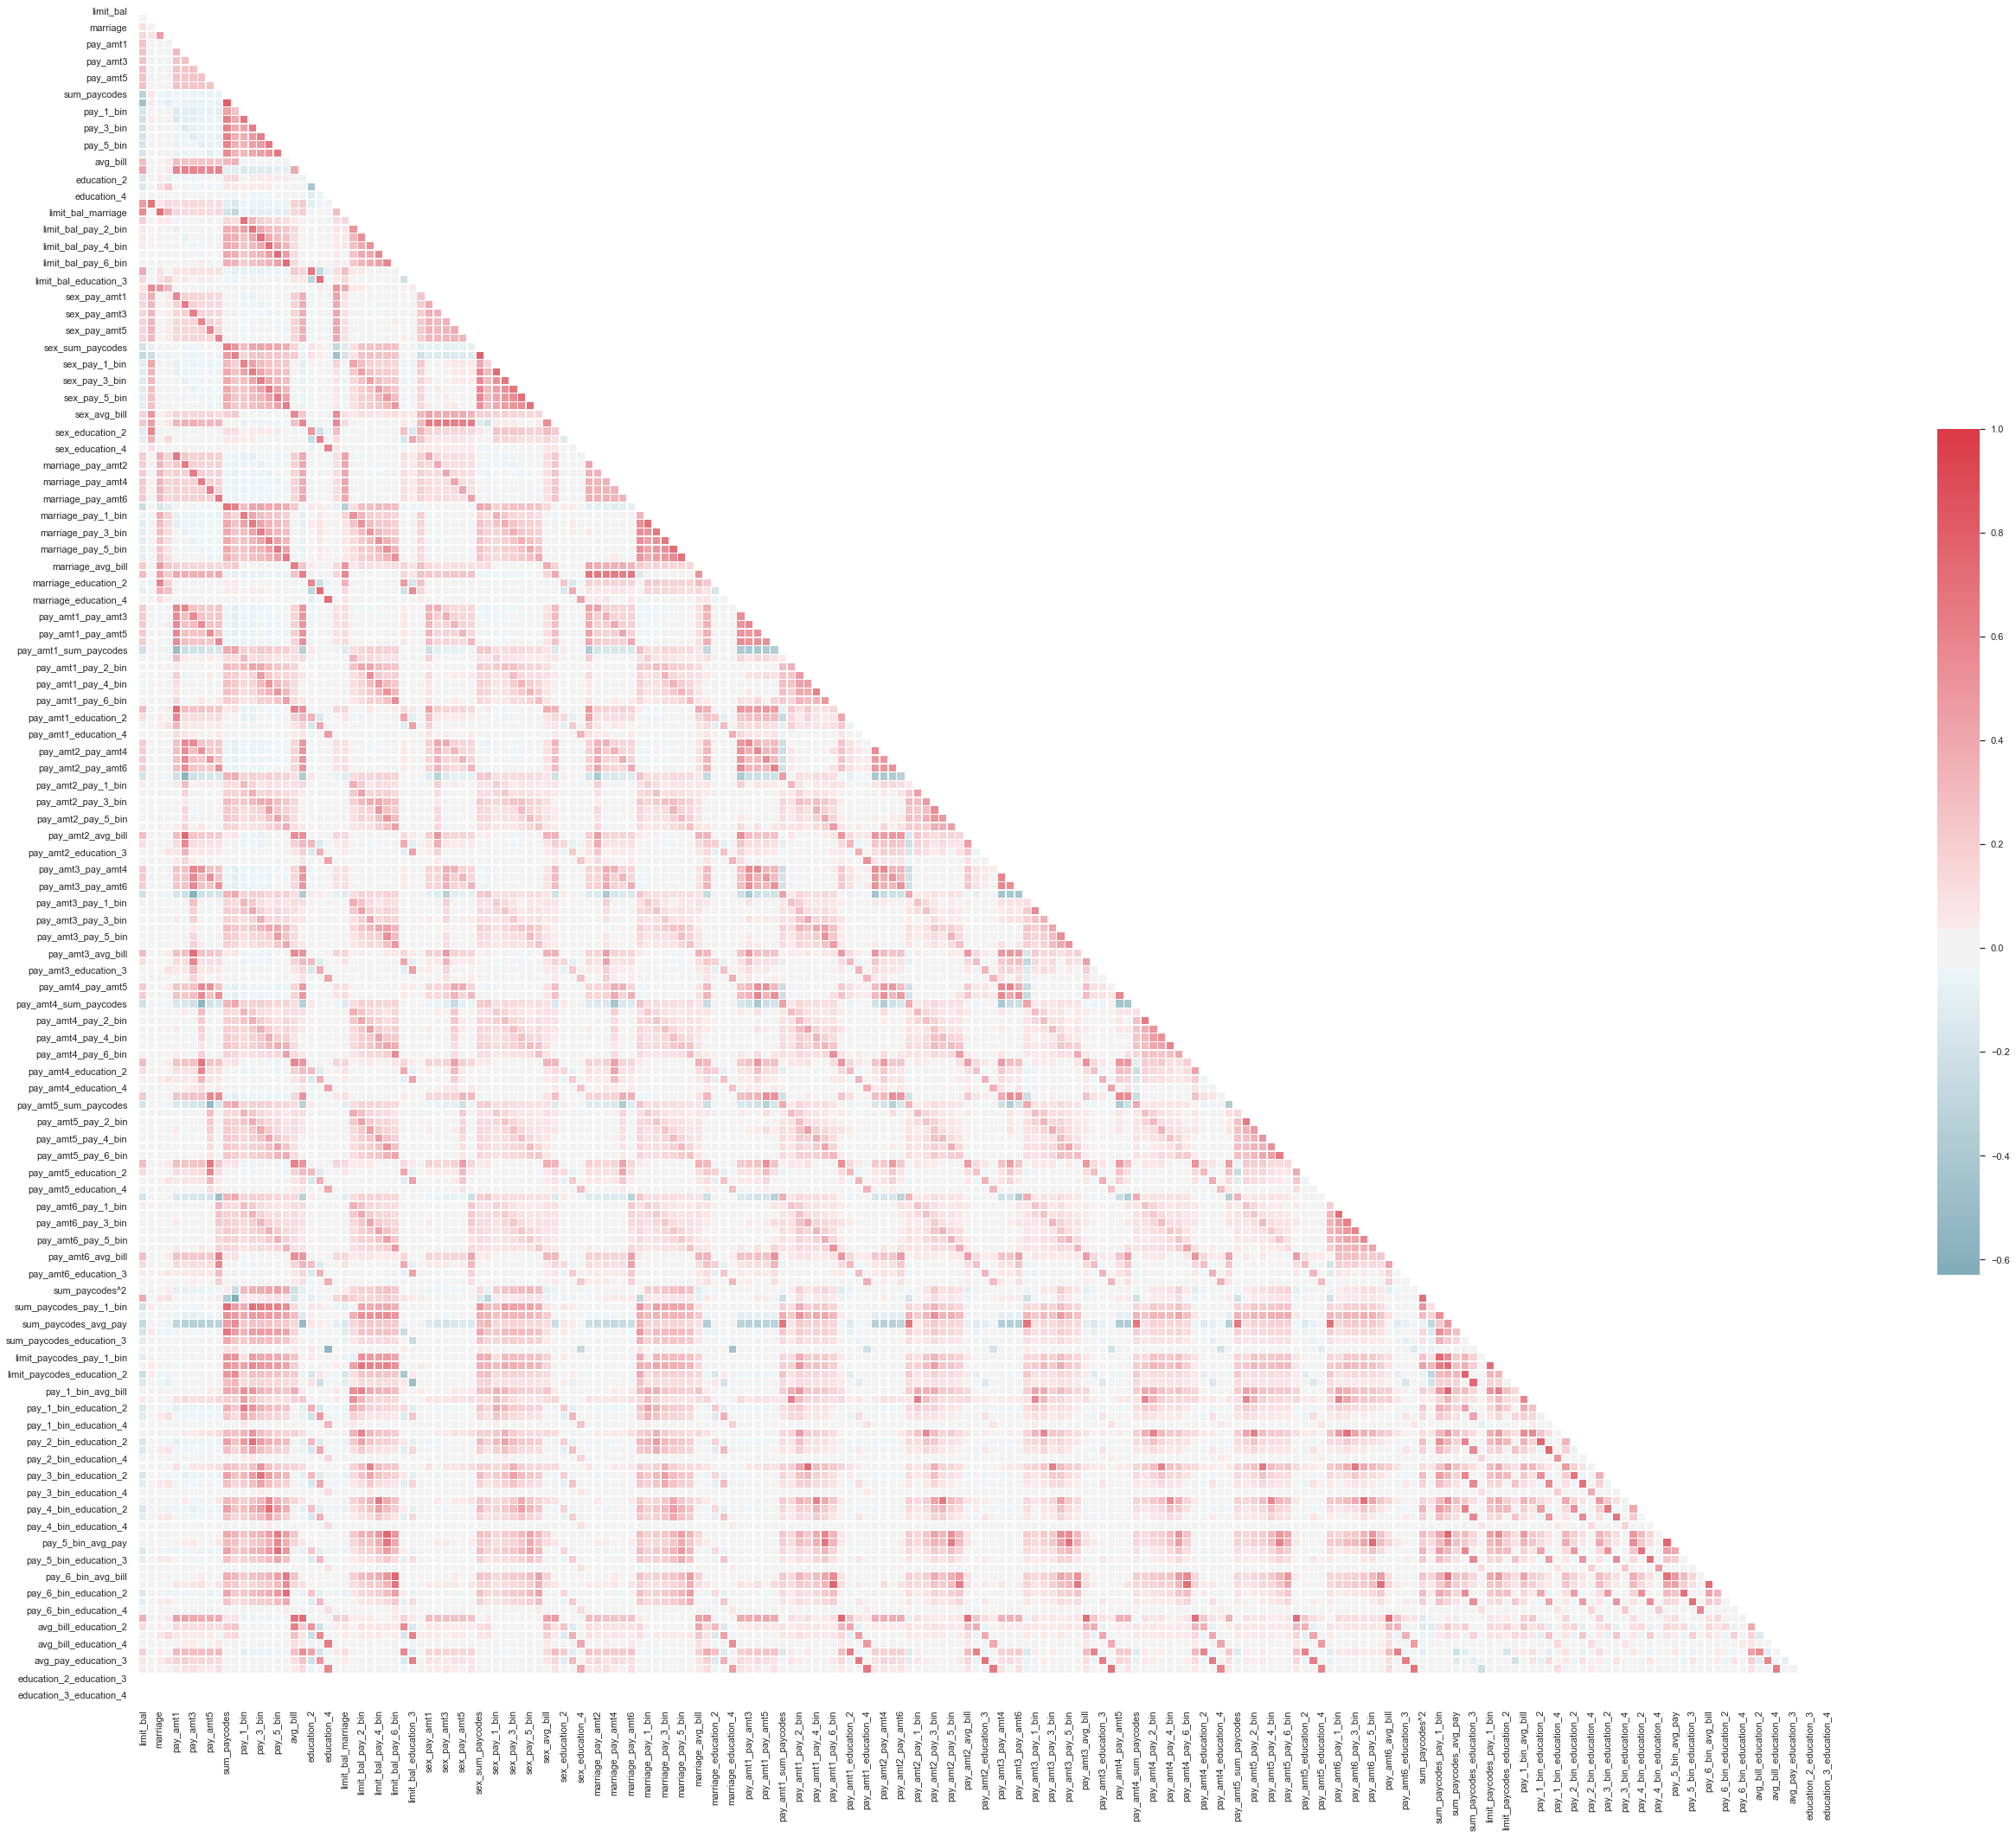

In [46]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_poly.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(44, 36))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [47]:



X_poly_2 = sm.add_constant(X_poly)
est = sm.OLS(y, X_poly_2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     27.10
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        19:29:28   Log-Likelihood:                -9715.1
No. Observations:               22500   AIC:                         1.983e+04
Df Residuals:                   22301   BIC:                         2.142e+04
Df Model:                         198                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [48]:
# import statsmodels.api as sm
# X_poly_con = sm.tools.add_constant(X_poly)
# logit_model = sm.Logit(y, X_poly_con)
# result = logit_model.fit(maxiter=1000, method='minimize')

In [49]:
# result.summary()

In [50]:
p = est2.pvalues
high_p = p[p > .2].keys()

X_poly_simplified = X_poly.drop(columns=high_p)
X_poly_simplified.drop(columns=['education_2_education_3', 'education_2_education_4', 'education_3_education_4'],
                      inplace=True)
X_poly_simplified.head()

,limit_bal,marriage,age,pay_amt1,pay_amt2,pay_amt3,limit_paycodes,pay_1_bin,pay_2_bin,pay_3_bin,...,pay_1_bin_education_2,pay_1_bin_education_4,pay_2_bin_education_2,pay_2_bin_education_3,pay_2_bin_education_4,pay_3_bin_education_2,pay_3_bin_education_3,pay_5_bin_avg_pay,pay_5_bin_education_2,avg_bill_education_2
0,200000.0,1.0,30.0,6600.0,6000.0,5860.0,2398000.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4910.0,0.0,0.000000
1,200000.0,0.0,27.0,0.0,0.0,0.0,-2402000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,20000.0,0.0,28.0,3353.0,3.0,5101.0,39800.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6543.833333
3,50000.0,0.0,23.0,4175.0,41000.0,51705.0,-50500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39625.000000
4,20000.0,1.0,47.0,780.0,0.0,0.0,-180200.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195.000000


In [51]:
X_poly_2 = sm.add_constant(X_poly_simplified)
est = sm.OLS(y, X_poly_2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     102.8
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        19:29:28   Log-Likelihood:                -9779.9
No. Observations:               22500   AIC:                         1.966e+04
Df Residuals:                   22448   BIC:                         2.008e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [52]:
p = est2.pvalues
high_p = p[p > .2].keys()

X_poly_simplified = X_poly_simplified.drop(columns=high_p)
# X_poly_simplified.drop(columns=poly_drop,
#                       inplace=True)
X_poly_simplified.head()

,limit_bal,marriage,age,pay_amt1,pay_amt2,pay_amt3,limit_paycodes,pay_1_bin,pay_3_bin,pay_4_bin,...,limit_paycodes_education_3,pay_1_bin_avg_bill,pay_1_bin_education_2,pay_1_bin_education_4,pay_2_bin_education_2,pay_2_bin_education_4,pay_3_bin_education_2,pay_3_bin_education_3,pay_5_bin_avg_pay,avg_bill_education_2
0,200000.0,1.0,30.0,6600.0,6000.0,5860.0,2398000.0,1.0,1.0,1.0,...,2398000.0,146221.333333,0.0,0.0,0.0,0.0,0.0,1.0,4910.0,0.000000
1,200000.0,0.0,27.0,0.0,0.0,0.0,-2402000.0,0.0,0.0,0.0,...,-0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,20000.0,0.0,28.0,3353.0,3.0,5101.0,39800.0,0.0,1.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6543.833333
3,50000.0,0.0,23.0,4175.0,41000.0,51705.0,-50500.0,0.0,0.0,0.0,...,-0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39625.000000
4,20000.0,1.0,47.0,780.0,0.0,0.0,-180200.0,0.0,0.0,0.0,...,-0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195.000000


In [53]:
X_poly_2 = sm.add_constant(X_poly_simplified)
est = sm.OLS(y, X_poly_2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     113.9
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        19:29:29   Log-Likelihood:                -9781.8
No. Observations:               22500   AIC:                         1.966e+04
Df Residuals:                   22453   BIC:                         2.003e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

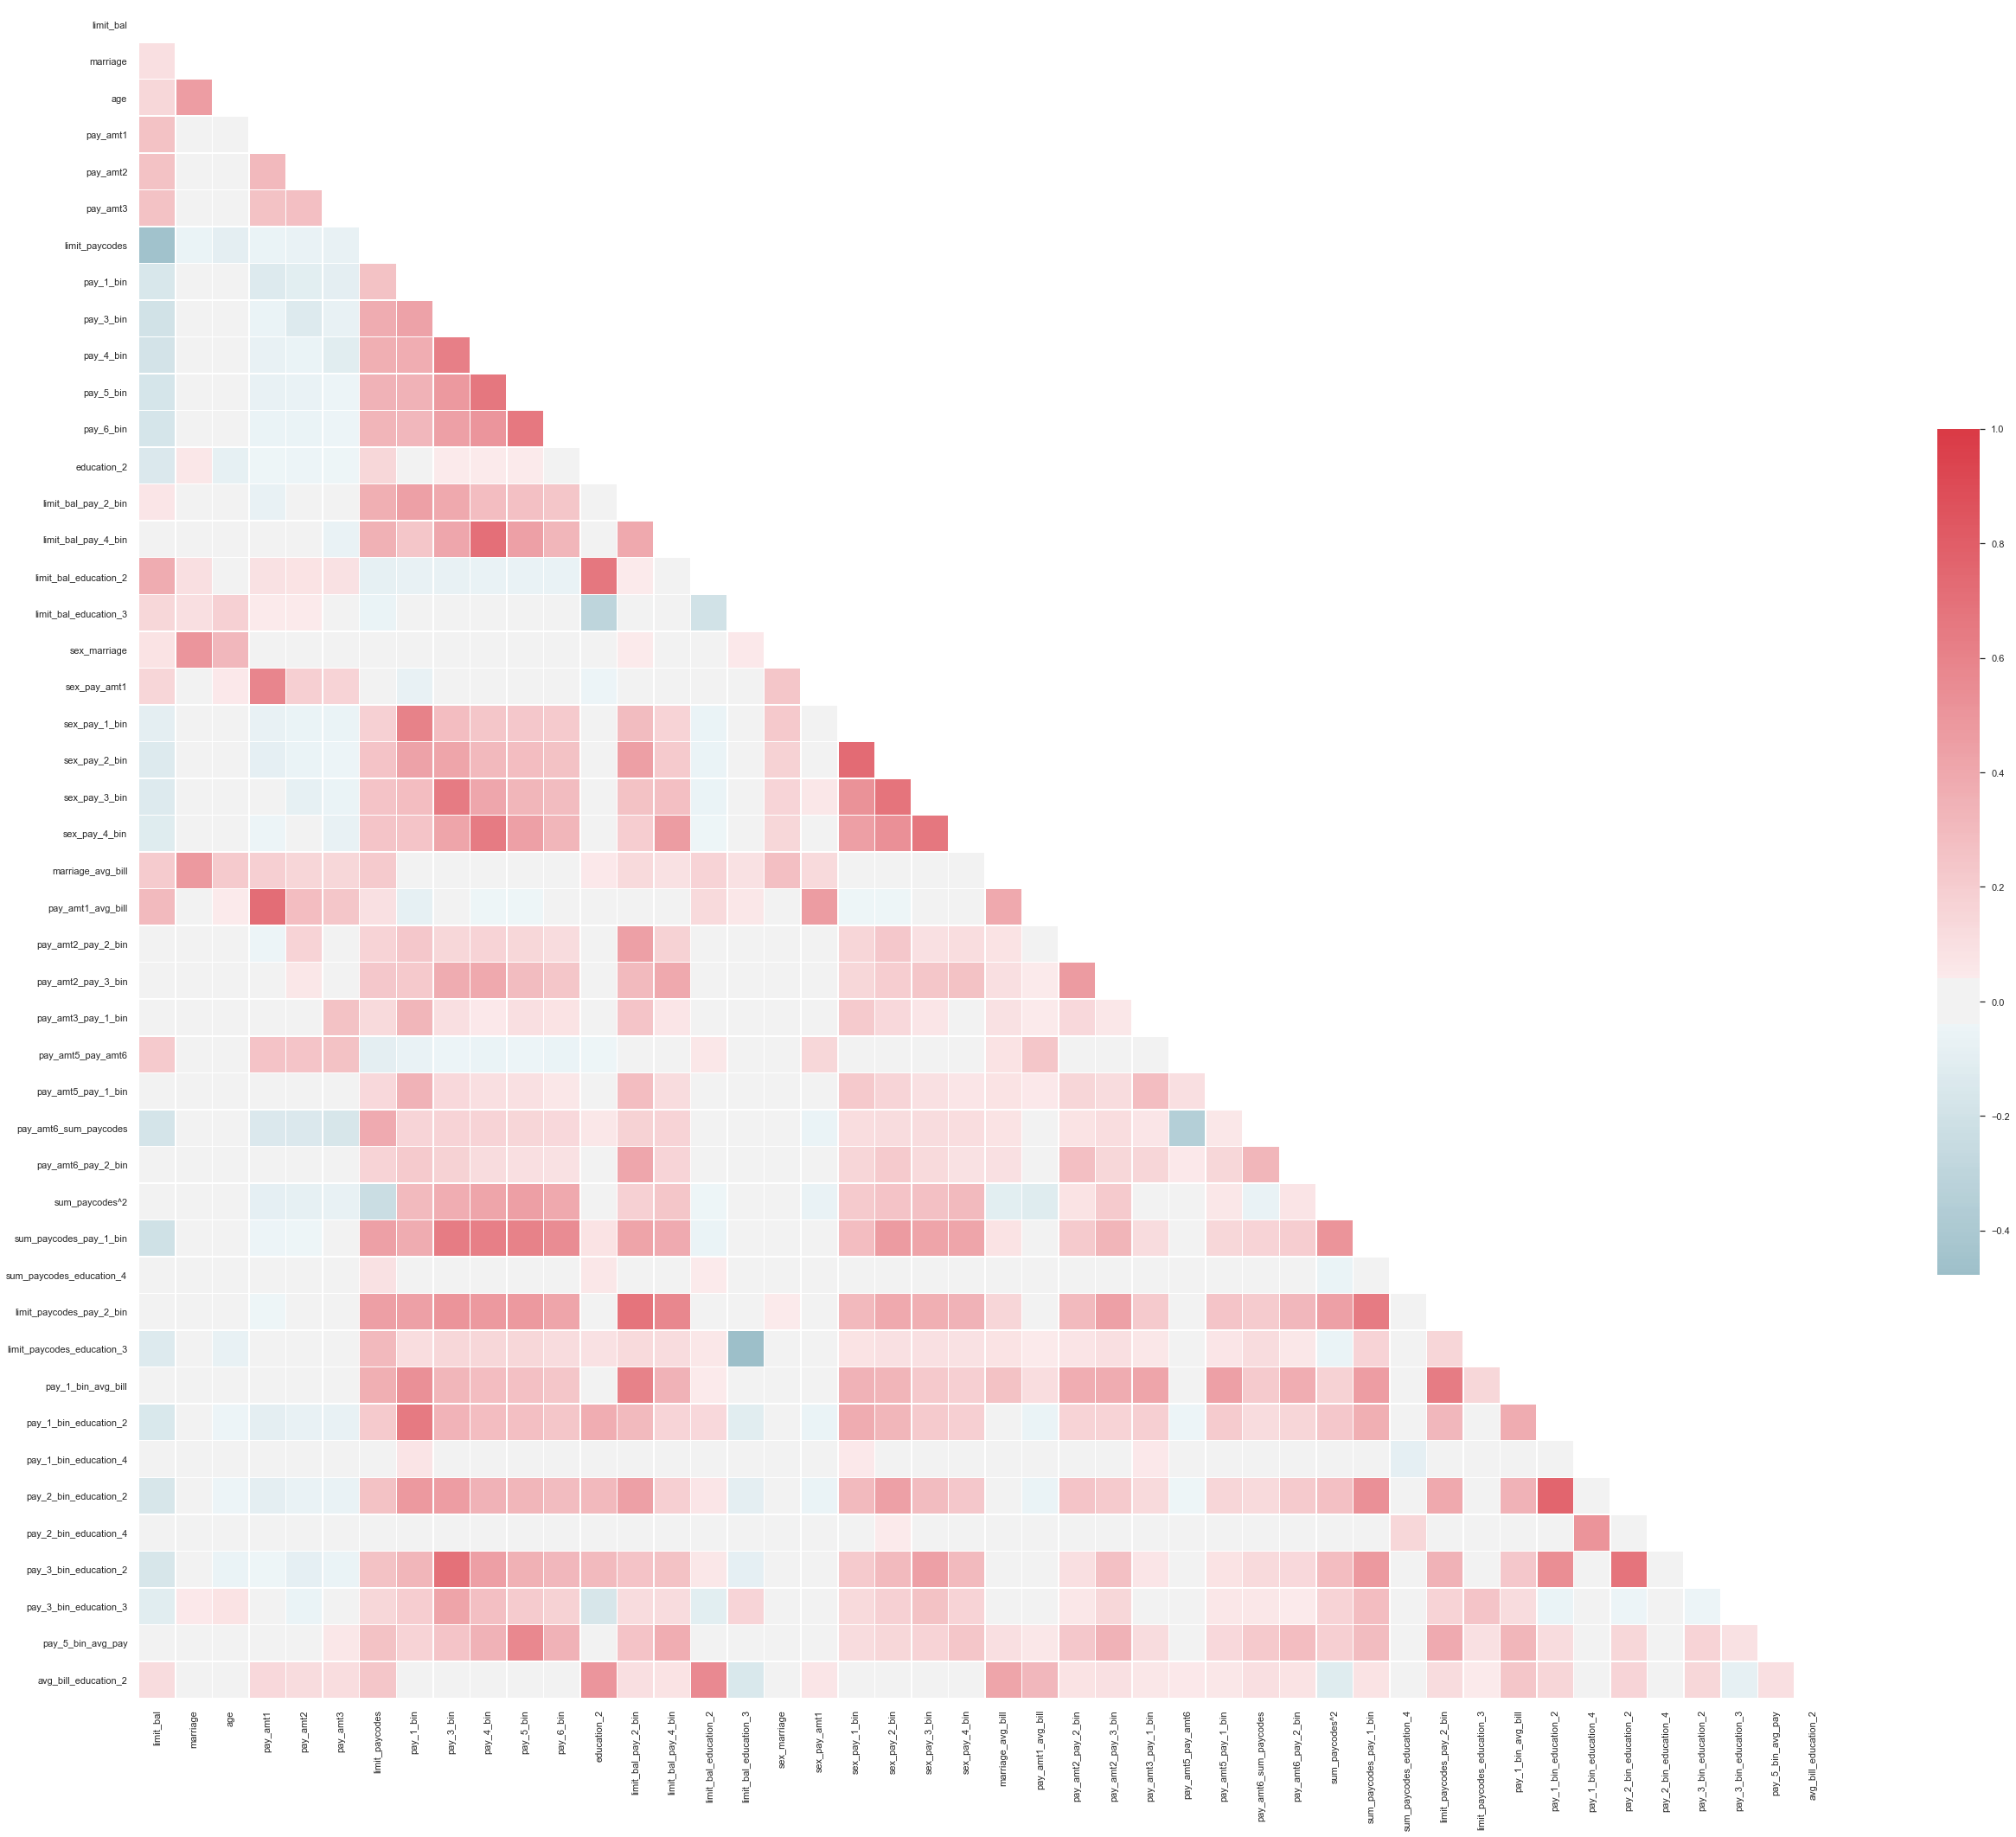

In [54]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_poly_simplified.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(44, 36))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## TRAIN-TEST SPLIT

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_poly_simplified, y, random_state=1)

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

### Baseline

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred = logreg.predict(X_test)

print(metrics.f1_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

NameError: name 'metrics' is not defined

In [ ]:
results = {}
results['baseline'] = (f1_score(y_test, y_pred))

In [ ]:
lr_coef_df = pd.DataFrame(data=logreg.coef_)
lr_coef_df.columns = X_poly_simplified.columns
lr_coef_df = lr_coef_df.T.sort_values(by=0).T
lr_coef_df.T

In [ ]:
sorted_df = lr_coef_df.T
sorted_df.iloc[sorted_df[0].abs().argsort()][::-1].tail(10)

In [ ]:
lr_coefs = sum(sorted_df[0].abs())
lr_coef_df.plot(kind='bar', title='Model Coefficients', legend=False, figsize=(16,8))

## GRIDSEARCH SETUP

In [ ]:
param_grid = { 
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [.0001, .001, .01, .1, 1.0, 10.0, 100.0],
    'solver': ['sag', 'saga', 'liblinear'],
#     'class_weight': [{1:}]
}

### Class imbalance treatment

### SMOTE

In [ ]:
smoten = SMOTE(sampling_strategy='minority', random_state=23)
X_train_smote, y_train_smote = smoten.fit_sample(X_train, y_train)

In [ ]:
CV_smote = GridSearchCV(LogisticRegression(),
                      param_grid, n_jobs=-1, scoring='f1', verbose=1)
CV_smote.fit(X_train_smote, y_train_smote)

In [ ]:
### Identify the best params 
print(CV_smote.best_estimator_)

#Identify the best score during fitting with cross-validation
print(CV_smote.best_score_)

In [ ]:
y_pred_smote = CV_smote.best_estimator_.predict(X_test)

# checking metrics
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_smote))
print('Test Precision score: ', metrics.precision_score(y_test, y_pred_smote))
print('Test Recall score: ', metrics.recall_score(y_test, y_pred_smote))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_smote))

In [ ]:
results['smote'] = (f1_score(y_test, y_pred_smote))

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred_smote))

### Weighted

In [ ]:
#create a grid search object and fit it to the data

CV_weighted = GridSearchCV(LogisticRegression(class_weight='balanced'),
                      param_grid, n_jobs=-1, scoring='f1', verbose=2)
CV_weighted.fit(X_train, y_train)

In [ ]:
### Identify the best params 
print(CV_weighted.best_estimator_)


#Identify the best score during fitting with cross-validation
print(CV_weighted.best_score_)

In [ ]:
#predict on the test set

y_pred_weighted = CV_weighted.best_estimator_.predict(X_test)

# checking metrics
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_weighted))
print('Test Precision score: ', metrics.precision_score(y_test, y_pred_weighted))
print('Test Recall score: ', metrics.recall_score(y_test, y_pred_weighted))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_weighted))

In [ ]:
results['weighted'] = f1_score(y_test, y_pred_weighted)

### Weighted simplified

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=1)

scaler = StandardScaler()  
scaler.fit(X_train2)

X_train2 = scaler.transform(X_train2)  
X_test2 = scaler.transform(X_test2)

In [ ]:
#create a grid search object and fit it to the data

CV_weighted2 = GridSearchCV(LogisticRegression(class_weight='balanced'),
                      param_grid, n_jobs=-1, scoring='f1', verbose=2)
CV_weighted2.fit(X_train2, y_train2)

In [ ]:
### Identify the best params 
print(CV_weighted2.best_estimator_)


#Identify the best score during fitting with cross-validation
print(CV_weighted2.best_score_)

In [ ]:
#predict on the test set

y_pred_weighted2 = CV_weighted2.best_estimator_.predict(X_test2)

# checking metrics
print('Test Accuracy score: ', metrics.accuracy_score(y_test2, y_pred_weighted2))
print('Test Precision score: ', metrics.precision_score(y_test2, y_pred_weighted2))
print('Test Recall score: ', metrics.recall_score(y_test2, y_pred_weighted2))
print('Test F1 score: ', metrics.f1_score(y_test2, y_pred_weighted2))

In [ ]:
results['weighted_simp'] = f1_score(y_test2, y_pred_weighted2)

### DECISION TREE

In [ ]:
# creating our parameters to test
params_dtc = {'max_depth': range(1,21),
              'min_samples_split': [.00001, .0001, .001, .01],
              'min_impurity_decrease': [.00001, .0001, .001, .01],
           }

#create our estimaor
d_tree = DecisionTreeClassifier(random_state=1)

#create the instance of GridSearchCV using the F1 metric for our scoring. 
grid_tree = GridSearchCV(d_tree, params_dtc, cv=7, scoring='f1', n_jobs=-1, verbose=1)

In [ ]:
#fit the Gridsearch to our data
grid_tree.fit(X_train, y_train)

In [ ]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

In [ ]:
#Predict the response for test dataset
y_pred_tree = grid_tree.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("F1 Score:",metrics.f1_score(y_test, y_pred_tree))

In [ ]:
results['d_tree'] = f1_score(y_test, y_pred_tree)

In [ ]:
results

In [ ]:
lr_clf_weighted = LogisticRegression(solver='liblinear', class_weight='balanced')

lr_clf_weighted.fit(X_train, y_train)

y_pred_weighted = lr_clf_weighted.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_weighted))
print('Test Precision score: ', metrics.precision_score(y_test, y_pred_weighted))
print('Test Recall score: ', metrics.recall_score(y_test, y_pred_weighted))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_weighted))

In [ ]:
lr_coef_df = pd.DataFrame(data=CV_weighted.best_estimator_.coef_)
lr_coef_df.columns = X_poly_simplified.columns
lr_coef_df = lr_coef_df.T.sort_values(by=0).T

sorted_df = lr_coef_df.T
sorted_df.iloc[sorted_df[0].abs().argsort()][::-1].tail(20)

In [ ]:
poly_drop = list(sorted_df[sorted_df[0].abs() < .025].index)

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred_weighted))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_weighted)
classes = ['No Default', 'Defaulted']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [ ]:
lr_clf_coef_df = pd.DataFrame(data=lr_clf_weighted.coef_)
lr_clf_coef_df.columns = X_poly.columns
lr_clf_coef_df = lr_clf_coef_df.T.sort_values(by=0).T
lr_clf_coef_df.T

In [ ]:
list(sorted_df2[sorted_df2[0].abs() < .01].index)

In [ ]:
sorted_df2 = lr_clf_coef_df.T
sorted_df2.iloc[sorted_df2[0].abs().argsort()][::-1].tail(20)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# neighbors = list(range(1,16,2))
# algos = ['ball_tree', 'kd_tree', 'brute']
# p = list(range(1,6))
# weight = ['uniform', 'distance']
# params = {'n_neighbors': neighbors, 'algorithm': algos, 'p': p, 'weights': weight}
# grid_k = GridSearchCV(KNeighborsClassifier(), params, scoring='f1', verbose=1, n_jobs=-1, cv=7)
# grid_k.fit(X_train, y_train)

In [ ]:
# # examine the best model
# print(grid_k.best_score_)
# print(grid_k.best_params_)
# print(grid_k.best_estimator_)

In [ ]:
print(metrics.confusion_matrix(y_test, rfc_pred))

In [ ]:
results = {}

results['imbalanced'] = (accuracy_score(y_test, y_pred_test), f1_score(y_test, y_pred_test))

In [ ]:
df_train.hist('limit_bal')

In [ ]:
#create a list of parameters to check 
parameter_dict={'min_samples_leaf':[.01,.05,.1], 'max_depth':range(1,11), 'min_impurity_decrease':[.01,.05,.1]}

#create our estimaor
reg_tree=DecisionTreeRegressor(random_state=1)

In [ ]:
#create the instance of GridSearchCV
grid_tree=GridSearchCV(reg_tree, parameter_dict, cv=5, verbose=1, scoring='neg_mean_squared_error')

#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

In [ ]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

In [ ]:
from sklearn.metrics import mean_squared_error

#Predict the response for test dataset
y_pred_tree = grid_tree.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Testing Metric:", metrics.mean_squared_error(y_test, y_pred_tree))

In [ ]:
df_train.boxplot('sum_paycodes', 'default', showfliers=False)

In [ ]:
df_train.boxplot('pay_1', 'default', showfliers=False)

In [ ]:
conditions = [df_train.pay_1 <= 0, df_train.pay_1 > 0]
choices = [0, 1]

print(df_train.pay_1.value_counts())
df_train['pay1_simplified'] = np.select(conditions, choices, df_train.pay_1)
print(df_train.pay1_simplified.value_counts())

In [ ]:
df_train.groupby('default').pay1_simplified.value_counts(normalize=True)

In [ ]:
conditions = [df_train.pay_2 <= 0, df_train.pay_2 > 0]
choices = [0, 1]

print(df_train.pay_2.value_counts())
df_train['pay2_simplified'] = np.select(conditions, choices, df_train.pay_2)
print(df_train.pay2_simplified.value_counts())

In [ ]:
df_train.groupby('default').pay2_simplified.value_counts(normalize=True)

In [ ]:
df_train.head()

In [ ]:
df_train.groupby('default').sum_paycodes.describe()

In [ ]:
df_train.boxplot('age', 'default', showfliers=False)

In [ ]:
plt.scatter(x = df_train[df_train['default']==0].sum_paycodes.head(1000), y = df_train[df_train['default']==0].limit_bal.head(1000),
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Default')
plt.scatter(x = df_train[df_train['default']==1].sum_paycodes.head(1000), y = df_train[df_train['default']==1].limit_bal.head(1000),
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Defaulted')
plt.xlabel('Age')
plt.ylabel('CC Limit')
plt.title('Age vs CC Limit')
plt.legend()

plt.show()

In [ ]:
df_train.hist('bill_amt1')

* drop pay_amt6
* drop bill_amt2, drop bill_amt4, drop bill_amt6

In [ ]:
df_train['']

In [ ]:
df_train.iloc[:,5:].head(20)

In [ ]:
df_train.iloc[:,5:].corr()

In [ ]:
df_train.plot.scatter('PAY_0', 'default payment next month')

In [ ]:
cols =[]
for i in df_train:
    cols.append(i)

In [ ]:
n = 4
row_groups= [cols[i:i+n] for i in range(0, len(cols), n) ]
for i in row_groups:
    pp = sns.pairplot(data=df_train, y_vars=['default payment next month'],x_vars=i, kind='reg', height=3)

In [ ]:
df_train.hist('AGE')

In [ ]:
plt.scatter(x = df_train[df_train['default']==0].age.head(1000), y = df_train[df_train['default']==0].limit_bal.head(1000),
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Default')
plt.scatter(x = df_train[df_train['default']==1].age.head(1000), y = df_train[df_train['default']==1].limit_bal.head(1000),
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Defaulted')
plt.xlabel('Age')
plt.ylabel('CC Limit')
plt.title('Age vs CC Limit')
plt.legend()

plt.show()

In [ ]:
plt.scatter(x = df_train[df_train['default']==0].age.head(1000), y = df_train[df_train['default']==0].pay_1.head(1000),
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Default')
plt.scatter(x = df_train[df_train['default']==1].age.head(1000), y = df_train[df_train['default']==1].pay_1.head(1000),
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Defaulted')
plt.xlabel('Age')
plt.ylabel('Payment Code 1')
plt.title('Age vs Payment Code 1')
plt.legend()

plt.show()

In [ ]:
plt.scatter(x = df_train[df_train['default']==0].limit_bal.head(1000), y = df_train[df_train['default']==0].pay_1.head(1000),
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Default')
plt.scatter(x = df_train[df_train['default']==1].limit_bal.head(1000), y = df_train[df_train['default']==1].pay_1.head(1000),
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Defaulted')
plt.xlabel('CC Limit')
plt.ylabel('Payment Code 1')
plt.title('CC Limit vs Payment Code 1')
plt.legend()

plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features_2 = PolynomialFeatures(degree=2, include_bias=False)
features_poly = polynomial_features_2.fit_transform(df_train)
poly_columns = polynomial_features_2.get_feature_names(df_train.columns)

features_poly = pd.DataFrame(features_poly, columns=poly_columns)
features_poly.head()

In [ ]:
features_poly.columns

In [ ]:
# trying logistic regression again with the balanced dataset
y_train_up = upsampled.default
X_train_up = upsampled.drop('default', axis=1)

upsampled_dt = DecisionTreeClassifier(max_depth=5)

upsampled_dt.fit(X_train, y_train)

upsampled_pred = upsampled_dt.predict(X_test)

# checking f1
print('Test F1 score: ', f1_score(y_test, upsampled_pred))